<a href="https://colab.research.google.com/github/Srishti20022/Data-Science/blob/main/Retail_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##    Retail Data Analysis 

#### Import  Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####Read  the data from source

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#####Get  summary statistics  on our DataFrame  data and the  minimum  value in the column  profit

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#all  column name

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#unique ship  mode

In [ ]:
data['Ship Mode'].nunique()

4

In [ ]:
#unique  categories   in  each  column

In [ ]:
for column in data:
    print(f"Number of unique categories in {column} is {data[column].nunique()}")

Number of unique categories in Ship Mode is 4
Number of unique categories in Segment is 3
Number of unique categories in Country is 1
Number of unique categories in City is 531
Number of unique categories in State is 49
Number of unique categories in Postal Code is 631
Number of unique categories in Region is 4
Number of unique categories in Category is 3
Number of unique categories in Sub-Category is 17
Number of unique categories in Sales is 5825
Number of unique categories in Quantity is 14
Number of unique categories in Discount is 12
Number of unique categories in Profit is 7287


##### plot   for  all   numeric  variable

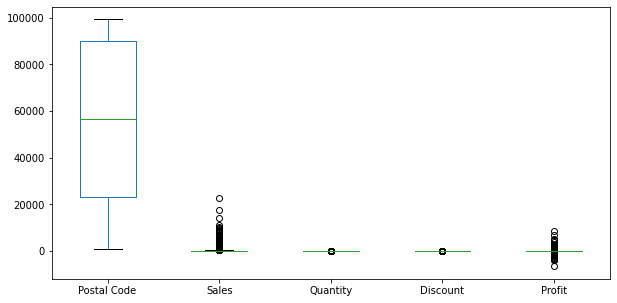

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import randn, randint, uniform, sample
data.plot(kind = 'box', figsize = (10, 5))

######Plot   pairplot  for  Regionwise Data Distribution of  Parameters  sales,postal code,discount,profit  amd quantity.

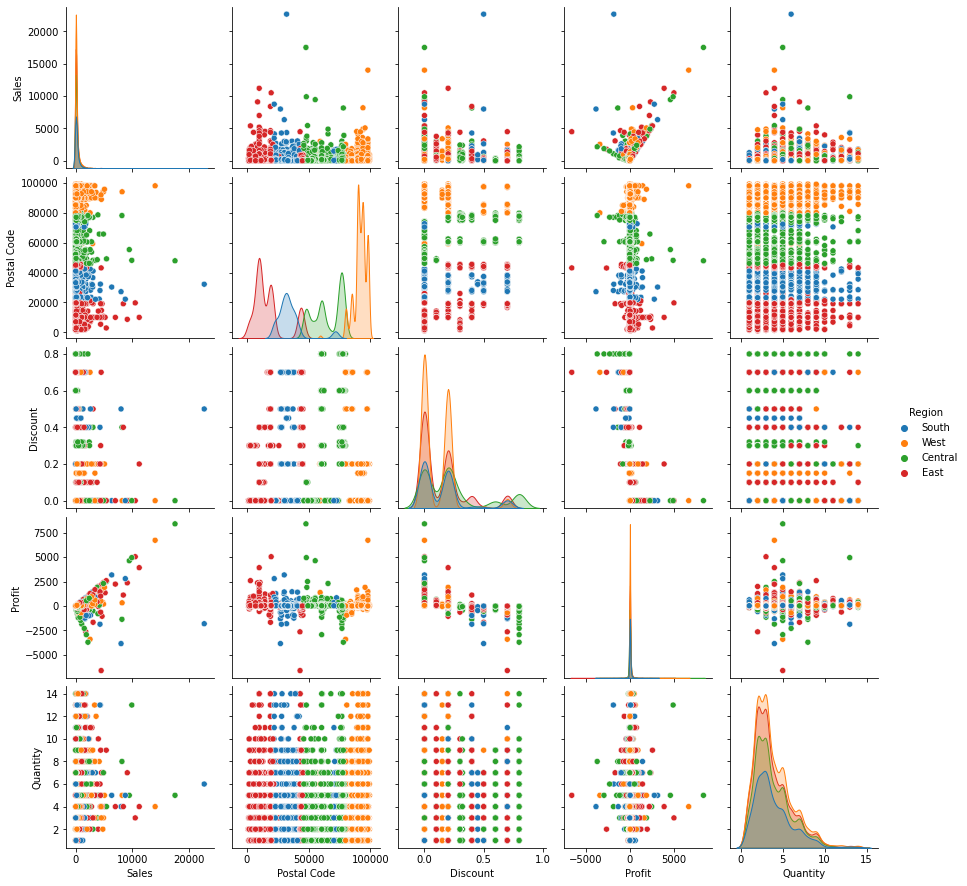

In [ ]:
d = data[['Sales', 'Postal Code', 'Discount', 'Profit', 'Quantity', 'Region']]
sns.pairplot(d, hue = 'Region')

### Impact of  Sales through  Ship Mode 

#### Shipmodewise Total Sales

In [ ]:
x = data['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [ ]:
df_sub1=data.groupby(['Ship Mode'])
df_sub= df_sub1.Sales.sum()
df_sub

Ship Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

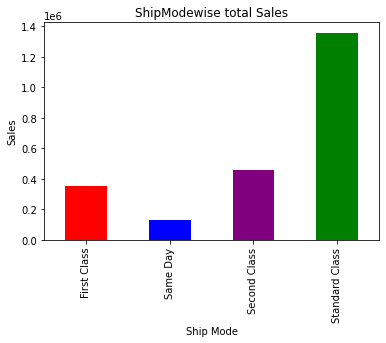

In [ ]:
dat = df_sub.plot.bar(color = {'red', 'blue', 'purple', 'green'})
plt.title('ShipModewise total Sales')
plt.ylabel('Sales')
plt.show()

###### Shipmodewise Total Profit

In [ ]:
df8=data.groupby(['Ship Mode'])
df2 = df8.Profit.sum()

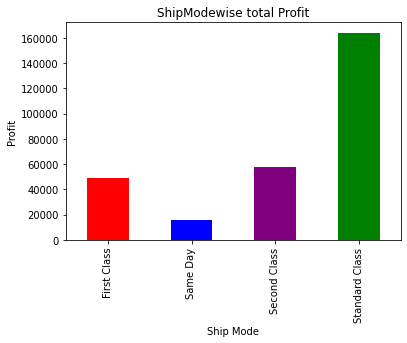

In [ ]:
df2.plot.bar(color = {'red', 'blue', 'purple', 'green'})
plt.title('ShipModewise total Profit')
plt.ylabel('Profit')
plt.show()

###### Shipmodewise Total Discount

In [ ]:
ff=data.groupby(['Ship Mode'])
f2=ff['Discount'].sum()

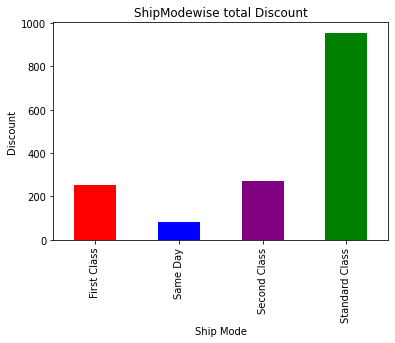

In [ ]:
p = f2.plot.bar(color = {'red', 'blue', 'purple', 'green'})
plt.title('ShipModewise total Discount')
plt.ylabel('Discount')
plt.show()

In [ ]:
d1 = data.groupby(['Segment'])
df1 = d1['Sales'].sum()
df2= d1['Profit'].sum()
df3 = d1['Discount'].sum()

Text(0.5, 1.0, 'ShipModeWise total Discount')

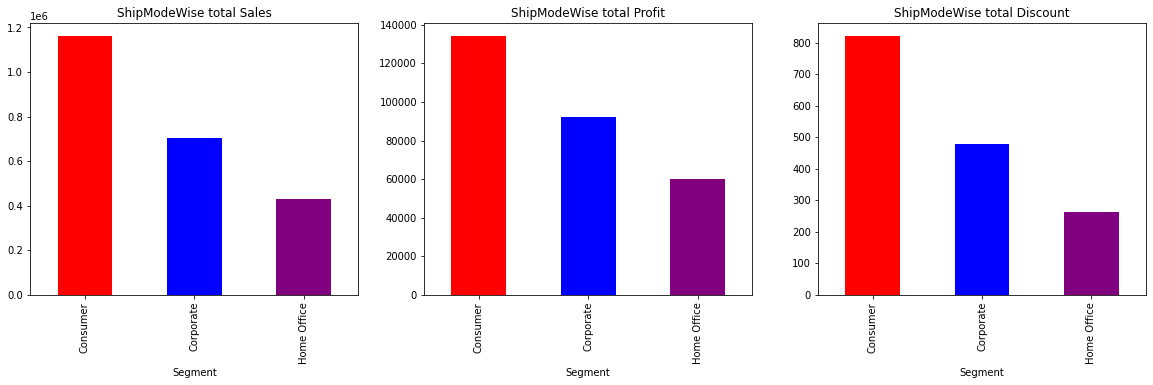

In [ ]:
fig = plt.figure(figsize = (20, 5))

subplot1 = fig.add_subplot(1,3,1)
df1.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('ShipModeWise total Sales')

subplot1 = fig.add_subplot(1,3,2)
df2.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('ShipModeWise total Profit')

subplot1 = fig.add_subplot(1,3,3)
df3.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('ShipModeWise total Discount')

###Segment  Wise Sales and It's Impact. plot  bar  plot  and   segment has highest  sales  and profit.

relation  between sales  and discount

#### SegmentWise Total Sales

In [ ]:
x1 = data['Segment'].unique()
x1

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
d_x=data.groupby('Segment').agg({'Sales':sum})['Sales']
d_y=data.Segment.unique()

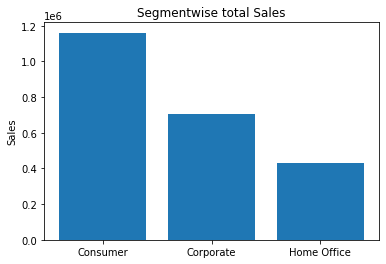

In [ ]:
plt.bar(d_y, d_x)
plt.title('Segmentwise total Sales')
plt.ylabel('Sales')
plt.show()

In [ ]:
gg = data.groupby(['Segment'])
a1 = gg.Sales.sum()
a1

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

#### SegmentWise Total Profit

In [ ]:
a2 = gg.Profit.sum()

#### SegmentWise Total Discount

In [ ]:
a3 = gg.Discount.sum()

Text(0.5, 1.0, 'SegmentWise total Discount')

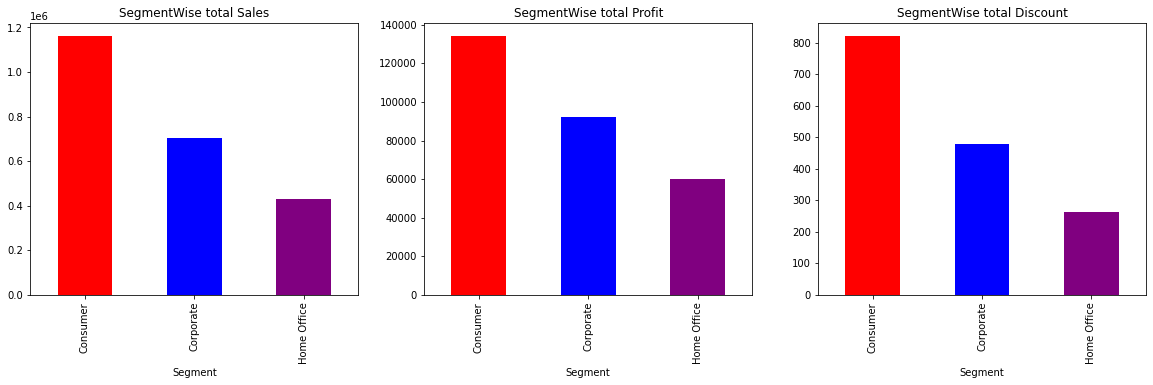

In [ ]:
fig = plt.figure(figsize = (20, 5))

subplot1 = fig.add_subplot(1,3,1)
a1.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('SegmentWise total Sales')

subplot1 = fig.add_subplot(1,3,2)
a2.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('SegmentWise total Profit')

subplot1 = fig.add_subplot(1,3,3)
a3.plot(kind = 'bar', color = {'red', 'blue', 'purple', 'green'})
subplot1.set_title('SegmentWise total Discount')

######Regionwise Total Sales and Profit Performance  .
pie chart plot and region  has   highest  sales and profit

In [ ]:
df = data.groupby(['Region'])
df1=df['Sales'].sum()
df1

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [ ]:
df2=df['Profit'].sum()

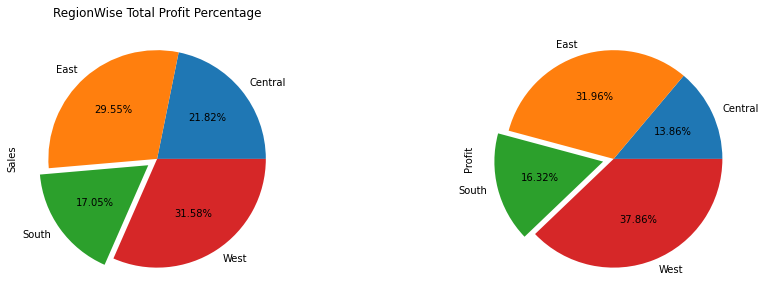

In [ ]:
fig = plt.figure(figsize=(15, 5))
explode1 = [0, 0,0.1, 0]
explode2 = [0.1 ,0, 0, 0]

subplot1 = fig.add_subplot(1, 2, 1)
df1.plot(kind = 'pie', autopct = '%1.2f%%', explode = explode1)
subplot1.set_title('RegionWise Total Sales Percentage')

subplot2 = fig.add_subplot(1, 2, 2)
df2.plot(kind = 'pie', autopct = '%1.2f%%', explode = explode1)
subplot1.set_title('RegionWise Total Profit Percentage')
plt.show()

#####Category-Wise Sales Performance.  plot pie chart    and  Category  that  has   highest  sales

In [ ]:
df = data.groupby(['Category'])
df1 = df['Sales'].sum()
df1

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [ ]:
df2=df['Profit'].sum()
df2

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

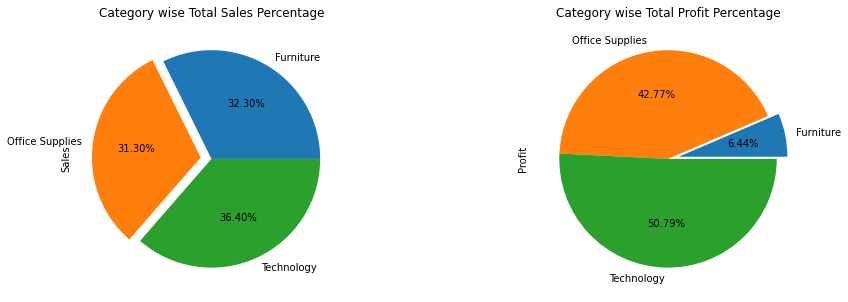

In [ ]:
fig = plt.figure(figsize=(15, 5))
explode1 = [0, 0.1, 0]
explode2 = [0.1, 0, 0]

subplot1 = fig.add_subplot(1, 2, 1)
df1.plot(kind = 'pie', autopct = '%1.2f%%', explode = explode1)
subplot1.set_title('Category wise Total Sales Percentage')

subplot2 = fig.add_subplot(1, 2, 2)
df2.plot(kind = 'pie', autopct = '%1.2f%%', explode = explode2)
subplot2.set_title('Category wise Total Profit Percentage')
plt.show()

###### Category-Wise Profit Performance

######Sub-Categoriwise Sales  and profit  Performance

In [ ]:
x4 = data['Sub-Category'].unique()
x4.sort()
x4 = print(x4)
x4

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


In [ ]:
x4 = np.array(['Accessories','Appliances','Art','Binders','Bookcases','Chairs','Copiers',
'Envelopes','Fasteners','Furnishings','Labels','Machines','Paper','Phones','Storage','Supplies','Tables'])

In [ ]:
df1 = data.groupby(['Sub-Category'])
df2 = df1['Sales'].sum()
df2

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

###### Sub-Categoriwise Profit Performance

In [ ]:
df3 = df1['Profit'].sum()
df3

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [ ]:
xpos = np.arange(len(x4))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

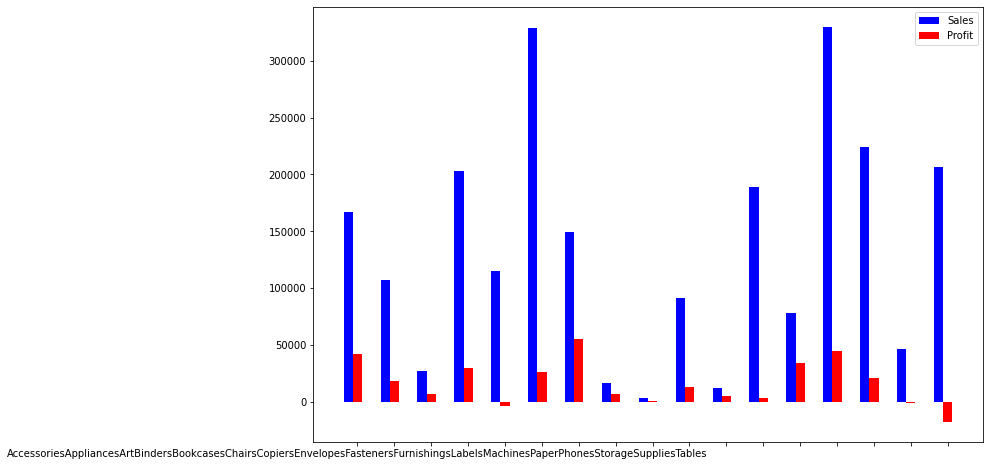

In [ ]:
fig = plt.subplots(figsize = (12, 8))
br1 = xpos
barwidth = 0.25
br2 = [x+barwidth for x in br1]
plt.bar(br1, df2, color = 'b', width = barwidth, label = 'Sales')

plt.bar(br2, df3, color='r', width = barwidth, label = 'Profit')
plt.xticks([r+barwidth for r in range(len(df2))], ['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables'])
plt.legend()
plt.show()
